# ***Real Estate Predictions of Chicago (LOF Unsupervised ML)***

## **Setting Env**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
from sklearn.neighbors import LocalOutlierFactor
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## **Data Loading**

In [4]:
realstate = pd.read_csv("/content/drive/MyDrive/PERSONAL/Projects/ML/RealEstateChicago/real_estate_data_chicago.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
realstate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,single_family,WEST ELSDON BRICK SINGLE FAMILY RAISED RANCH H...,1961.0,3.0,2.0,2.0,NaN,2.0,NaN,2080.0,1.0,148000.0,2000-09-15,319900.0,for_sale
1996,condos,Welcome to your spacious three bedroom condo i...,1962.0,3.0,2.0,2.0,NaN,1.0,NaN,1498.0,27.0,NaN,NaN,260000.0,for_sale
1997,condos,Luxury Residence with jaw dropping City and Ri...,2002.0,3.0,3.0,2.0,1.0,3.0,NaN,3700.0,37.0,1705000.0,2016-06-03,1449000.0,for_sale
1998,multi_family,"Welcome to this charming & RARE, meticulously ...",1946.0,6.0,5.0,5.0,NaN,2.0,6200.0,3654.0,NaN,NaN,NaN,749000.0,for_sale


In [ ]:
realstate.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale


In [ ]:
realstate["type"].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    single_family
1    single_family
2    single_family
3    single_family
4    single_family
Name: type, dtype: object

## **Data Info**

In [ ]:
realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
realstate.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2000, 15)

In [ ]:
realstate.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,listPrice
count,1790.000000,1940.00000,1999.00000,1937.000000,592.000000,1282.000000,9.920000e+02,1447.000000,1620.000000,1.415000e+03,1.994000e+03
mean,1946.050838,3.28866,2.43972,2.155911,1.189189,2.131825,7.156209e+03,2069.910159,7.183951,3.685186e+05,6.012279e+05
std,38.985904,1.75855,1.45649,1.106637,0.553119,11.367288,6.861154e+04,1691.518319,13.036822,6.156896e+05,1.202400e+06
min,1856.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000e+00,372.000000,1.000000,6.000000e+02,1.500000e+02
25%,1916.000000,2.00000,2.00000,1.000000,1.000000,1.000000,3.125000e+03,1170.000000,2.000000,1.117500e+05,2.250000e+05
50%,1943.000000,3.00000,2.00000,2.000000,1.000000,2.000000,3.750000e+03,1550.000000,2.000000,2.180000e+05,3.499000e+05
75%,1970.750000,4.00000,3.00000,3.000000,1.000000,2.000000,5.013000e+03,2355.000000,4.000000,3.950000e+05,5.750000e+05
max,2024.000000,21.00000,13.00000,8.000000,5.000000,400.000000,2.156000e+06,25000.000000,119.000000,7.500000e+06,2.350000e+07


## **Preprocessing**

In [5]:
realstate.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type                0
text                8
year_built        210
beds               60
baths               1
baths_full         63
baths_half       1408
garage            718
lot_sqft         1008
sqft              553
stories           380
lastSoldPrice     585
soldOn            585
listPrice           6
status              0
dtype: int64

In [6]:
realstate.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type             False
text              True
year_built        True
beds              True
baths             True
baths_full        True
baths_half        True
garage            True
lot_sqft          True
sqft              True
stories           True
lastSoldPrice     True
soldOn            True
listPrice         True
status           False
dtype: bool

In [7]:
realstate.isnull().any().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


13

### **Fill missing values**

In [8]:
# Impute missing values in the 'beds' column with the mean of that column
realstate['beds'] = realstate['beds'].fillna(realstate['beds'].mean())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Verify that missing values in the 'beds' column have been filled successfully
missing_values = realstate['beds'].isnull().sum()
missing_values
# Optional: Save the modified DataFrame back to a file if needed
realstate.to_csv('imputed_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           2000 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
realstate.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type             False
text              True
year_built        True
beds             False
baths             True
baths_full        True
baths_half        True
garage            True
lot_sqft          True
sqft              True
stories           True
lastSoldPrice     True
soldOn            True
listPrice         True
status           False
dtype: bool

In [12]:
# Impute missing values in the 'beds' column with the mean of that column
realstate['garage'] = realstate['garage'].fillna(realstate['garage'].mean())
# Verify that missing values in the 'beds' column have been filled successfully
missing_values = realstate['garage'].isnull().sum()
missing_values
# Optional: Save the modified DataFrame back to a file if needed
realstate.to_csv('imputed_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
realstate.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type             False
text              True
year_built        True
beds             False
baths             True
baths_full        True
baths_half        True
garage           False
lot_sqft          True
sqft              True
stories           True
lastSoldPrice     True
soldOn            True
listPrice         True
status           False
dtype: bool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Impute missing values in the 'baths_half' column with the mean of that column
realstate['baths_half'] = realstate['baths_half'].fillna(realstate['baths_half'].mean())
# Impute missing values in the 'baths' column with the mean of that column
realstate['baths'] = realstate['baths'].fillna(realstate['baths'].mean())
# Impute missing values in the 'baths_full' column with the mean of that column
realstate['baths_full'] = realstate['baths_full'].fillna(realstate['baths_full'].mean())
realstate.to_csv('imputed_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
realstate.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type             False
text              True
year_built        True
beds             False
baths            False
baths_full       False
baths_half       False
garage           False
lot_sqft          True
sqft              True
stories           True
lastSoldPrice     True
soldOn            True
listPrice         True
status           False
dtype: bool

In [16]:
# Impute missing values in the 'baths_half' column with the mean of that column
realstate['lot_sqft'] = realstate['lot_sqft'].fillna(realstate['lot_sqft'].mean())
realstate['sqft'] = realstate['sqft'].fillna(realstate['sqft'].mean())
realstate['stories'] = realstate['stories'].fillna(realstate['stories'].mean())
realstate['soldOn'] = realstate['lastSoldPrice'].fillna(realstate['lastSoldPrice'].mean())
realstate['listPrice'] = realstate['listPrice'].fillna(realstate['listPrice'].mean())
realstate['lastSoldPrice'] = realstate['lastSoldPrice'].fillna(realstate['lastSoldPrice'].mean())
realstate.to_csv('imputed_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
realstate.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type             False
text              True
year_built        True
beds             False
baths            False
baths_full       False
baths_half       False
garage           False
lot_sqft         False
sqft             False
stories          False
lastSoldPrice    False
soldOn           False
listPrice        False
status           False
dtype: bool

In [18]:
realstate["year_built"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       1951.0
1       1922.0
2       1947.0
3       1945.0
4       1907.0
         ...  
1995    1961.0
1996    1962.0
1997    2002.0
1998    1946.0
1999    1918.0
Name: year_built, Length: 2000, dtype: float64

In [19]:
realstate['year_built'] = realstate['year_built'].fillna(realstate['year_built'].mean())
realstate.to_csv('imputed_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
realstate.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type             False
text              True
year_built       False
beds             False
baths            False
baths_full       False
baths_half       False
garage           False
lot_sqft         False
sqft             False
stories          False
lastSoldPrice    False
soldOn           False
listPrice        False
status           False
dtype: bool

In [21]:
# Replace missing values in the text column with a special category representing missing data
special_value = 'Unknown'
realstate['text'] = realstate['text'].fillna(special_value)

# Optionally, you can save the modified DataFrame back to a file
realstate.to_csv('filled_dataset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
realstate.isnull().any()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


type             False
text             False
year_built       False
beds             False
baths            False
baths_full       False
baths_half       False
garage           False
lot_sqft         False
sqft             False
stories          False
lastSoldPrice    False
soldOn           False
listPrice        False
status           False
dtype: bool

In [23]:
realstate.isnull().any().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [24]:
realstate.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.000000,1.0,5615.0,3000.0,2.0,368518.594346,368518.594346,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.000000,2.0,6566.0,2900.0,2.0,105000.000000,105000.000000,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,1.189189,3.0,5375.0,1170.0,2.0,60000.000000,60000.000000,325600.0,for_sale


## **Feature Engineering**

#### **Label Encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['type', 'status','text']:
    realstate[col] = label_encoder.fit_transform(realstate[col])

# Optionally, you can save the encoded DataFrame back to a file
realstate.to_csv('encoded_dataset_label.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
realstate.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,5,327,1951.0,4.0,4.0,3.0,1.000000,1.0,5615.0,3000.0,2.0,368518.594346,368518.594346,750000.0,0
1,5,952,1922.0,4.0,3.0,2.0,1.000000,2.0,6566.0,2900.0,2.0,105000.000000,105000.000000,499900.0,0
2,5,797,1947.0,4.0,2.0,2.0,1.189189,3.0,5375.0,1170.0,2.0,60000.000000,60000.000000,325600.0,0


In [27]:
realstate.to_csv("real_estate_data_chicago.csv", index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### **Applying StandardScaler**

In [29]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_columns = ['type','year_built', 'beds', 'baths', 'baths_full', 'baths_half',
                     'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice',
                     'soldOn', 'listPrice']

# Apply StandardScaler
scaler = StandardScaler()
realstate[numerical_columns] = scaler.fit_transform(realstate[numerical_columns])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
realstate.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,0.837495,327,0.134225,0.410817,1.071796,0.775256,-0.629215,-0.124412,-0.031911,0.646665,-0.441958,1.124368e-16,1.124368e-16,0.123946,0
1,0.837495,952,-0.652278,0.410817,0.384871,-0.143197,-0.629215,-0.014490,-0.012220,0.577137,-0.441958,-5.090258e-01,-5.090258e-01,-0.084419,0


All ready...

## **Visualization**

In [ ]:
realstate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,5,327,1951.0,1.0,4.0,3.0,1.000000,1.0,5615.000000,3000.000000,2.000000,3.685186e+05,3.685186e+05,750000.0,0
1,5,952,1922.0,2.0,3.0,2.0,1.000000,2.0,6566.000000,2900.000000,2.000000,1.050000e+05,1.050000e+05,499900.0,0
2,5,797,1947.0,3.0,2.0,2.0,1.189189,3.0,5375.000000,1170.000000,2.000000,6.000000e+04,6.000000e+04,325600.0,0
3,5,1203,1945.0,2.0,3.0,2.0,1.000000,2.0,6138.000000,2511.000000,2.000000,1.700000e+05,1.700000e+05,620000.0,0
4,5,1406,1907.0,2.0,4.0,2.0,2.000000,2.0,8476.000000,2870.000000,3.000000,3.685186e+05,3.685186e+05,850000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,1625,1961.0,2.0,2.0,2.0,1.189189,2.0,7156.208669,2080.000000,1.000000,1.480000e+05,1.480000e+05,319900.0,0
1996,1,1918,1962.0,1.0,2.0,2.0,1.189189,1.0,7156.208669,1498.000000,27.000000,3.685186e+05,3.685186e+05,260000.0,0
1997,1,928,2002.0,3.0,3.0,2.0,1.000000,3.0,7156.208669,3700.000000,37.000000,1.705000e+06,1.705000e+06,1449000.0,0
1998,4,1800,1946.0,2.0,5.0,5.0,1.189189,2.0,6200.000000,3654.000000,7.183951,3.685186e+05,3.685186e+05,749000.0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


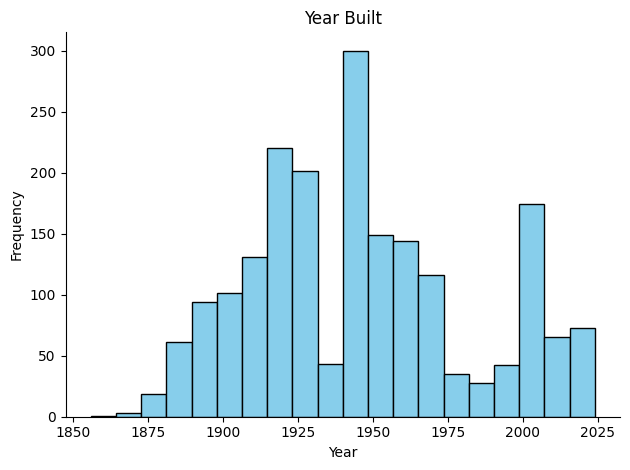

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
realstate['year_built'].plot(kind='hist', bins=20, title='Year Built', color='skyblue', edgecolor='black')

# Remove spines on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and adjust layout
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


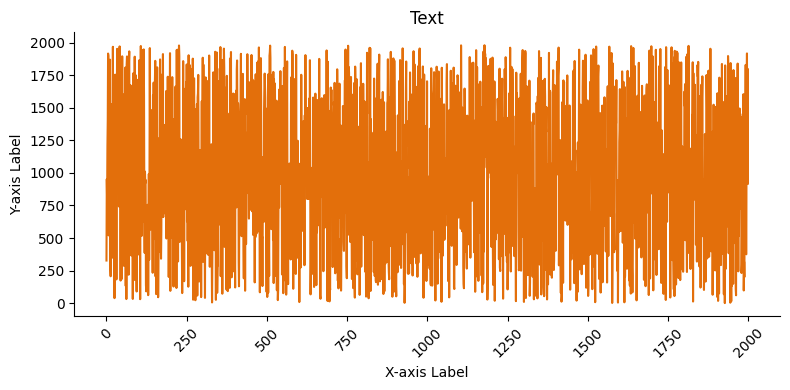

In [ ]:
import matplotlib.pyplot as plt

# Plot line graph
realstate['text'].plot(kind='line', figsize=(8, 4), title='Text', color='#e36f0b')

# Remove spines on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and adjust layout
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


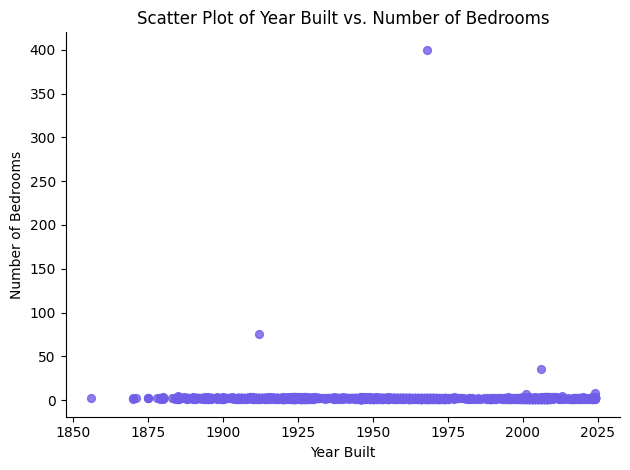

In [ ]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.scatter(x='year_built', y='beds', s=32, alpha=0.8, data=realstate, color='#705ee8')

# Remove spines on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Number of Bedrooms')
plt.title('Scatter Plot of Year Built vs. Number of Bedrooms')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


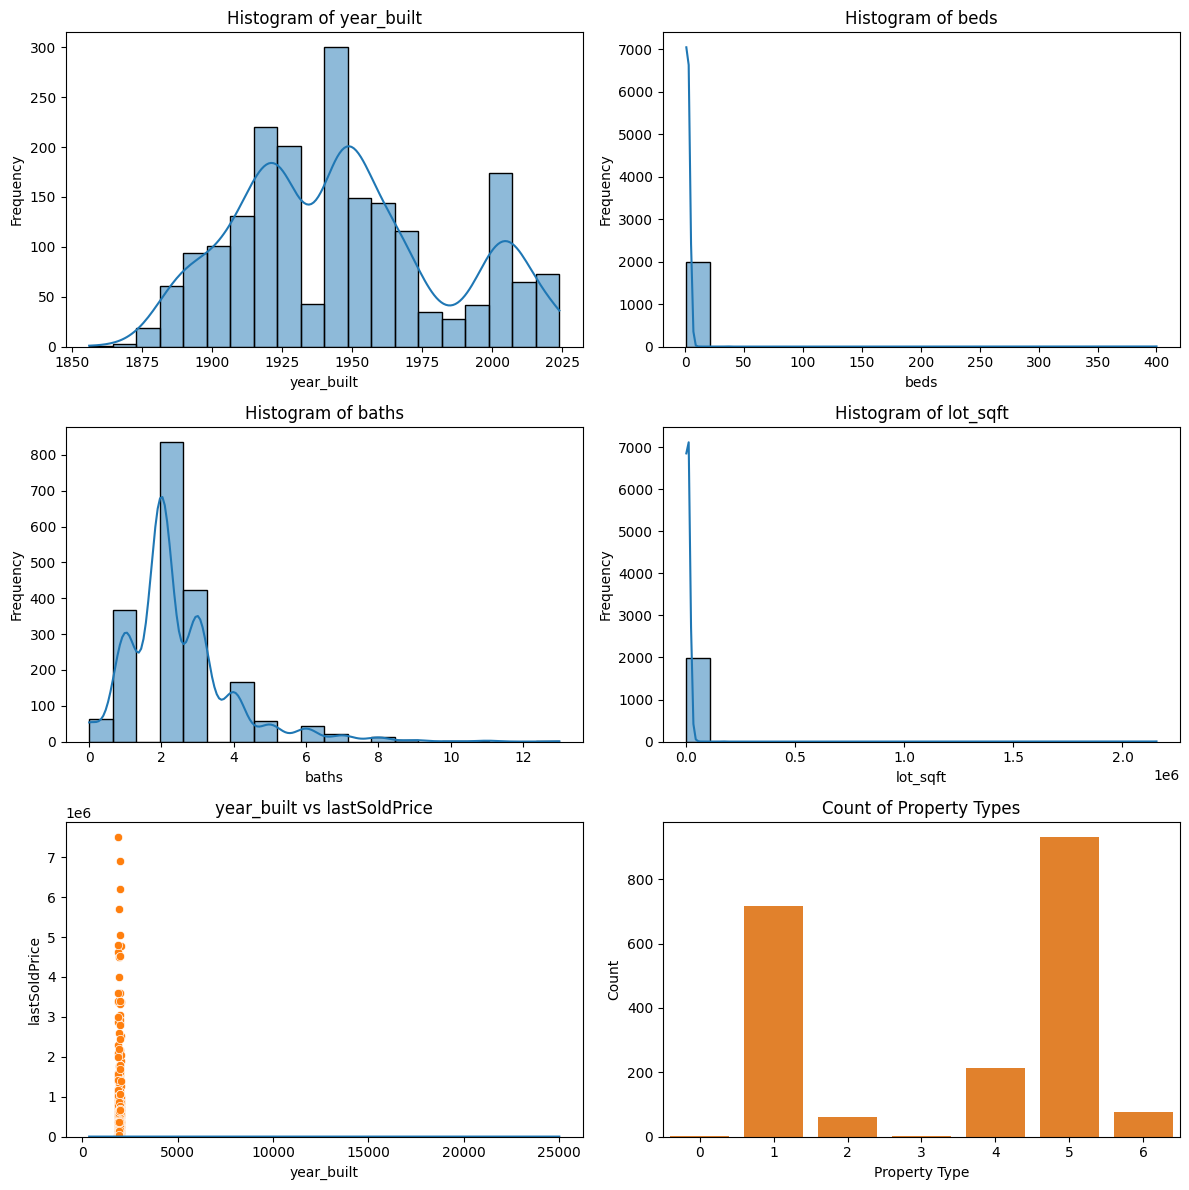

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Histograms
num_features = ['year_built', 'beds', 'baths', 'lot_sqft', 'sqft']
for i, feature in enumerate(num_features):
    ax = axs[i // 2, i % 2]
    sns.histplot(realstate[feature], bins=20, ax=ax, kde=True)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Scatter plots
scatter_features = [('year_built', 'lastSoldPrice'), ('sqft', 'lastSoldPrice')]
for i, (x, y) in enumerate(scatter_features):
    ax = axs[2, i]
    sns.scatterplot(data=realstate, x=x, y=y, ax=ax)
    ax.set_title(f'{x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Bar plot
ax = axs[2, 1]
sns.countplot(data=realstate, x='type', ax=ax)
ax.set_title('Count of Property Types')
ax.set_xlabel('Property Type')
ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



## **Model Selection**

### **Anomaly Detection (Local Outlier Factor (LOF))**

#### **Local Outlier Factor (LOF))**

In [82]:
from sklearn.neighbors import LocalOutlierFactor

# Select features for anomaly detection
X = realstate[['type', 'year_built', 'beds', 'baths', 'baths_full', 'baths_half', 'garage', 'lot_sqft', 'sqft', 'stories', 'lastSoldPrice']]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
# Initialize and fit LOF model
lof = LocalOutlierFactor(n_neighbors=1000, contamination=0.00001)
outlier_scores = lof.fit_predict(X)
lof


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LocalOutlierFactor(contamination=1e-05, n_neighbors=1000)

In [160]:
# Get outlier scores
negative_outlier_scores = -lof.negative_outlier_factor_
negative_outlier_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1.02739276, 0.99695582, 0.98361617, ..., 1.56425503, 1.36386176,
       0.98058259])

In [164]:
# Print outliers
print("Outliers:")
for i, score in enumerate(outlier_scores):
    if score < 0:  # Outliers have negative scores
        print(f"Data point {i} is an outlier with score {score}")


Outliers:
Data point 342 is an outlier with score -1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
# Print inliers
print("\nInliers:")
for i, score in enumerate(outlier_scores):
    if score >= 0:  # Inliers have non-negative scores
        print(f"Data point {i} is an inlier with score {score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Inliers:
Data point 0 is an inlier with score 1
Data point 1 is an inlier with score 1
Data point 2 is an inlier with score 1
Data point 3 is an inlier with score 1
Data point 4 is an inlier with score 1
Data point 5 is an inlier with score 1
Data point 6 is an inlier with score 1
Data point 7 is an inlier with score 1
Data point 8 is an inlier with score 1
Data point 9 is an inlier with score 1
Data point 10 is an inlier with score 1
Data point 11 is an inlier with score 1
Data point 12 is an inlier with score 1
Data point 13 is an inlier with score 1
Data point 14 is an inlier with score 1
Data point 15 is an inlier with score 1
Data point 16 is an inlier with score 1
Data point 17 is an inlier with score 1
Data point 18 is an inlier with score 1
Data point 19 is an inlier with score 1
Data point 20 is an inlier with score 1
Data point 21 is an inlier with score 1
Data point 22 is an inlier with score 1
Data point 23 is an inlier with score 1
Data point 24 is an inlier with score 1


Positive scores (greater than 1) suggest that the corresponding data points are likely to be inliers.
Negative scores suggest that the corresponding data points are likely to be outliers.


In [162]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette = silhouette_score(X, -outlier_scores)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.9185436167202341


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Silhouette Score: 0.9185436167202341



######LOF algorthm is best for anomly detection and there is only One Anomoly in the dataset...

###### **Visualize Outliers:**



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


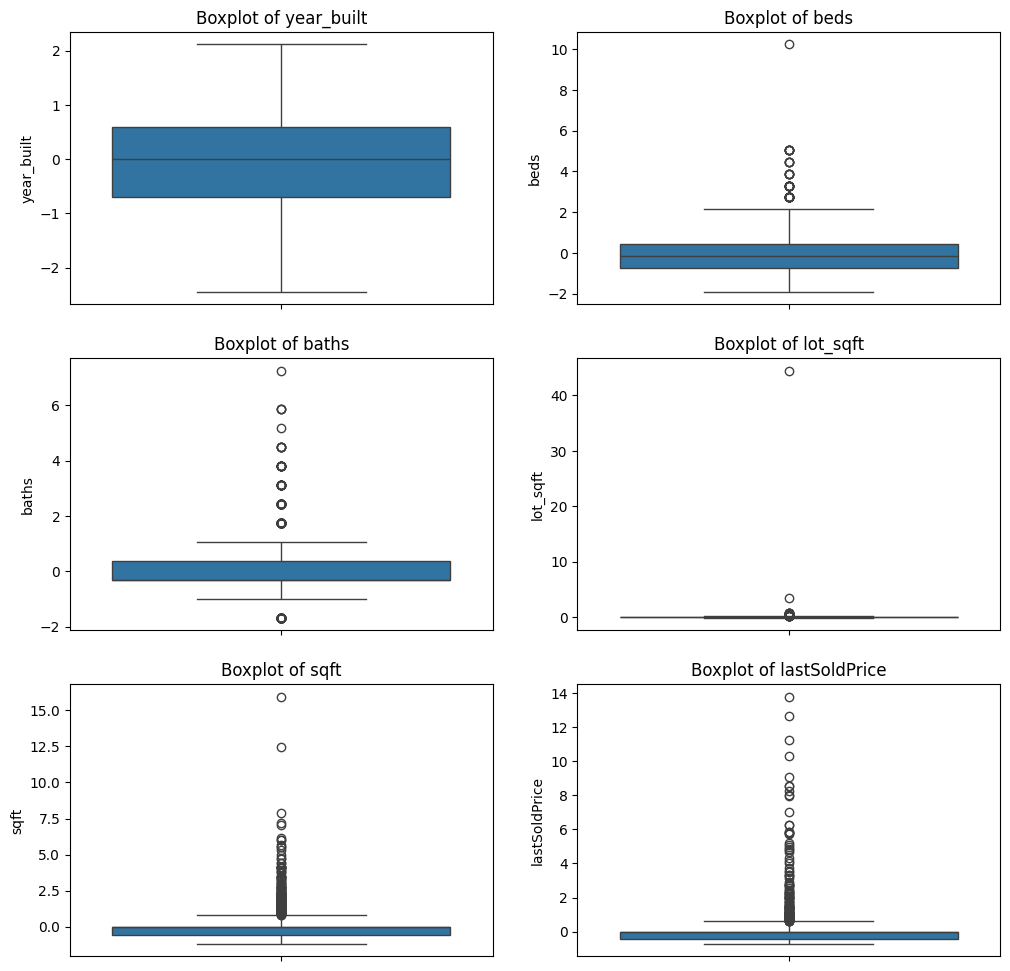

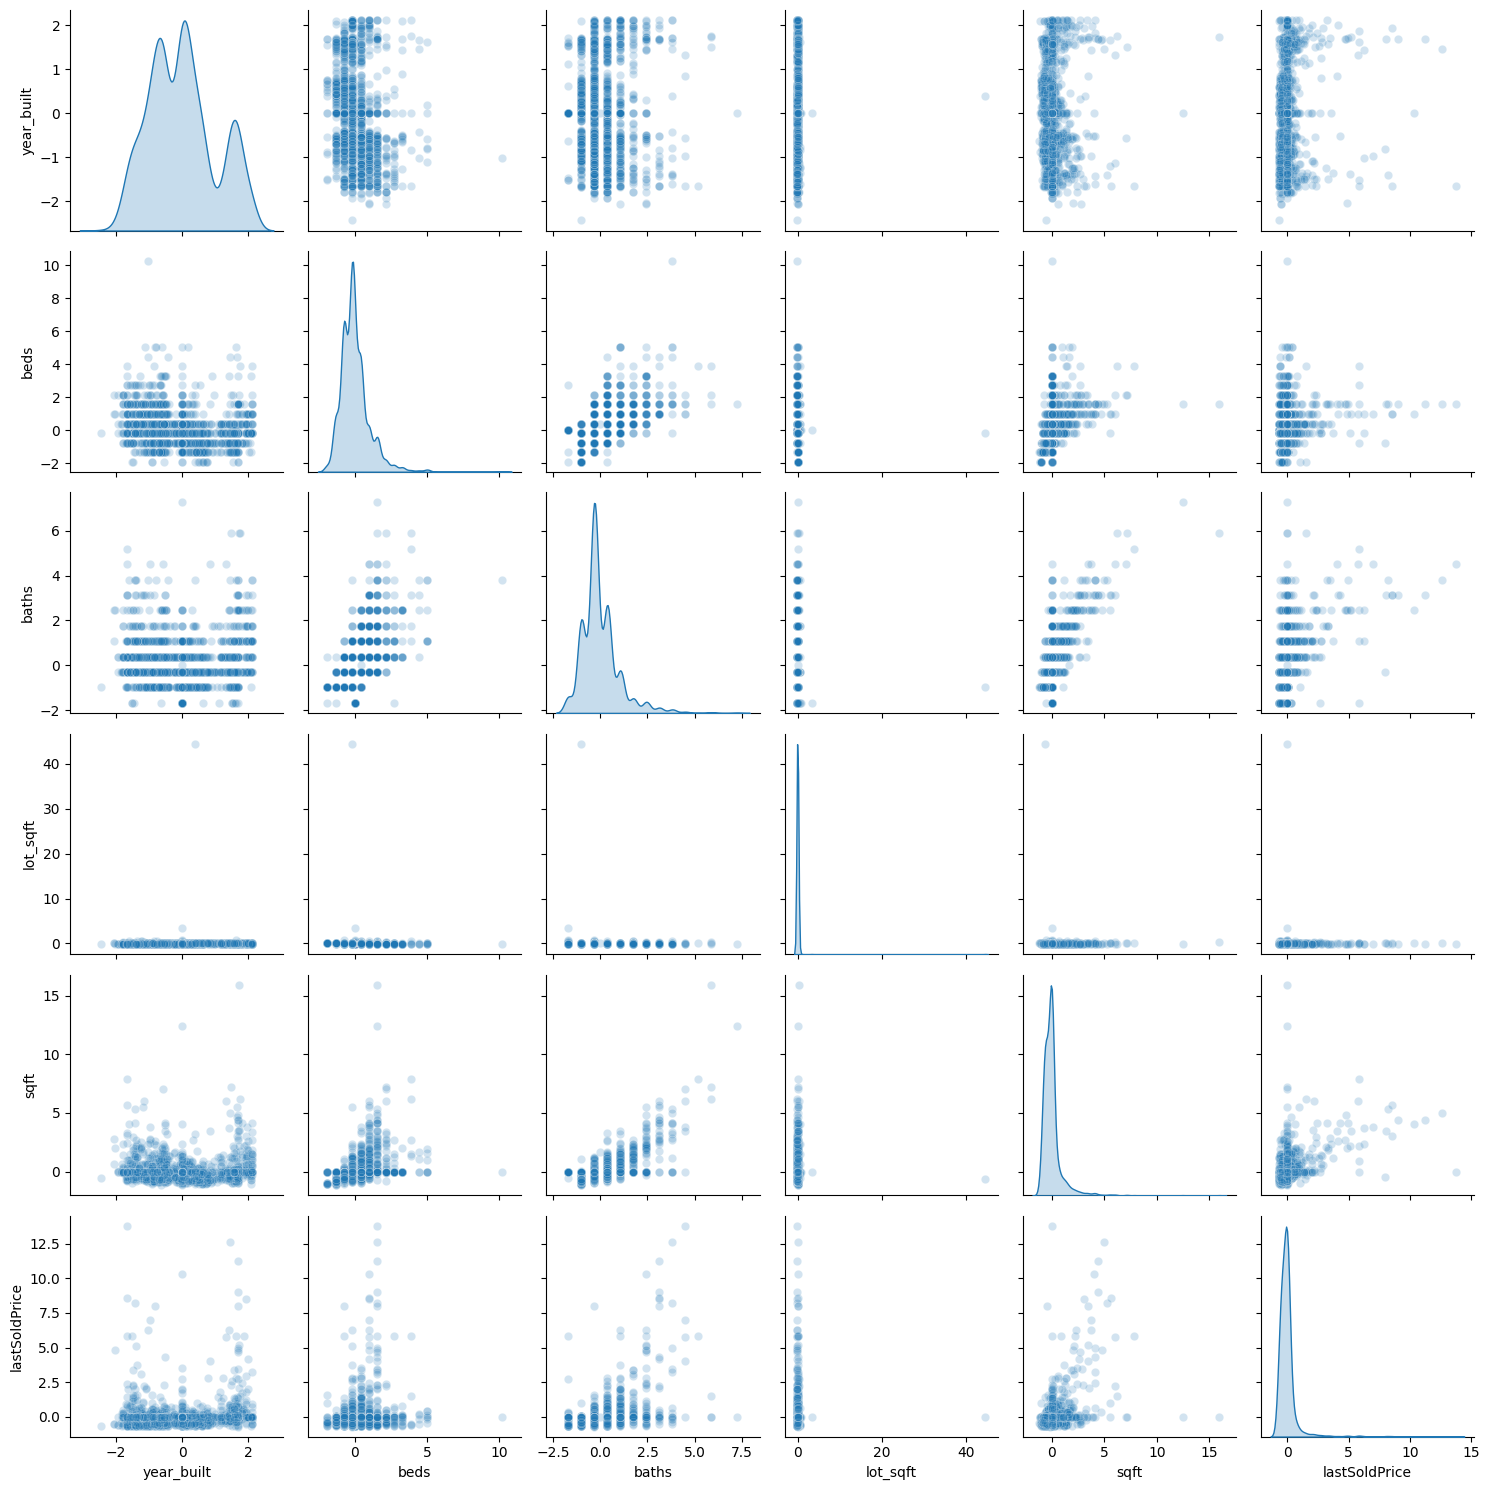

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Box plots for numerical features
num_features = ['year_built', 'beds', 'baths', 'lot_sqft', 'sqft', 'lastSoldPrice']
for i, feature in enumerate(num_features):
    ax = axs[i // 2, i % 2]
    sns.boxplot(data=realstate, y=feature, ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_ylabel(feature)

# Scatter plots for pairwise relationships
sns.pairplot(data=realstate, vars=num_features, diag_kind='kde', plot_kws={'alpha': 0.2})

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## **Hyperparameter Tuning**

###### The Model finnally perfrms very well on 0.00001 contimination value and finally gives 0.9185 Silhouette score

In [166]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette = silhouette_score(X, -outlier_scores)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.9185436167202341


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
